# Data UnderStanding

In [46]:
# Standard Library Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 3rd Party Library Imports
import seaborn as sns
from numpy.core.defchararray import add
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv1D

## Description Data

load data

In [47]:
df = pd.read_csv("dataset.csv")

show the first 5 rows of the dataset

In [48]:
df.head() 

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,...,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
0,1,1107,150,SB,P,64,2,0,F,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1303,200,C,L,45,1,9,E,3,...,0,0,0,0,0,0,4,0,0,1
2,3,1114,172,B,P,34,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
3,4,601,90,SC,L,34,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
4,5,1006,130,B,L,27,2,0,F,0,...,0,0,0,0,0,0,0,0,0,1


shows the last 5 rows of the dataset

In [49]:
df.tail() 

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,...,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
200212,200213,2102,353,B,P,48,2,0,Z,0,...,0,0,0,0,0,0,1,0,0,0
200213,200214,1308,212,SD,L,1,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,0
200214,200215,201,38,SB,P,3,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,0
200215,200216,1008,128,B,P,52,1,1,J,1,...,0,0,0,0,0,0,1,0,0,0
200216,200217,1016,117,SC,L,4,1,1,K,1,...,0,0,0,0,0,0,0,0,0,0


shows the statistical summary of the dataset

In [50]:
df.describe() 

,visit_id,kdkc,dati2,umur,jnspelsep,los,severitylevel,dx2_a00_b99,dx2_c00_d48,dx2_d50_d89,...,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
count,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,...,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.0,200217.000000
mean,100109.000000,1147.367816,184.793309,36.850602,1.669778,1.303356,0.444003,0.024893,0.008341,0.020703,...,0.005050,0.008381,0.016472,0.018370,0.001518,0.007457,0.847061,0.009225,0.0,0.500732
std,57797.813761,574.486224,107.226676,23.095928,0.470294,5.639751,0.725227,0.162484,0.093386,0.146842,...,0.073984,0.094393,0.155667,0.144878,0.043995,0.100441,1.301645,0.095603,0.0,0.500001
min,1.000000,101.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,50055.000000,903.000000,114.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,100109.000000,1101.000000,169.000000,39.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,150163.000000,1314.000000,232.000000,56.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000
max,200217.000000,2606.000000,528.000000,109.000000,2.000000,592.000000,3.000000,4.000000,3.000000,3.000000,...,3.000000,2.000000,4.000000,4.000000,3.000000,7.000000,23.000000,1.000000,0.0,1.000000


shows the number of rows and columns

In [51]:
df.shape 

(200217, 53)

shows that there are no null values

In [52]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200217 entries, 0 to 200216
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   visit_id       200217 non-null  int64 
 1   kdkc           200217 non-null  int64 
 2   dati2          200217 non-null  int64 
 3   typeppk        200217 non-null  object
 4   jkpst          200217 non-null  object
 5   umur           200217 non-null  int64 
 6   jnspelsep      200217 non-null  int64 
 7   los            200217 non-null  int64 
 8   cmg            200217 non-null  object
 9   severitylevel  200217 non-null  int64 
 10  diagprimer     200217 non-null  object
 11  dx2_a00_b99    200217 non-null  int64 
 12  dx2_c00_d48    200217 non-null  int64 
 13  dx2_d50_d89    200217 non-null  int64 
 14  dx2_e00_e90    200217 non-null  int64 
 15  dx2_f00_f99    200217 non-null  int64 
 16  dx2_g00_g99    200217 non-null  int64 
 17  dx2_h00_h59    200217 non-null  int64 
 18  dx2_

## Exploratory Data Analysis (EDA)

#### `Feature Correlation Heatmap`

Text(0.5, 1.0, 'Feature Correlation Heatmap')

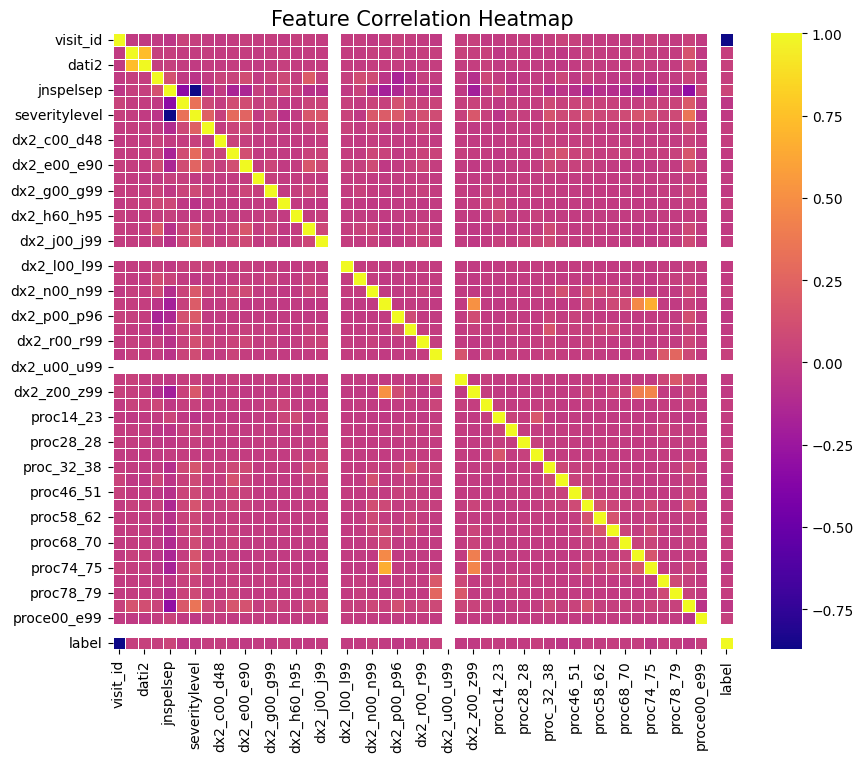

In [53]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# correlation matrix
correlation_matrix = numeric_df.corr()

# heatmap show the correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='plasma', linewidths=.5)
plt.title('Feature Correlation Heatmap', fontsize=15)

In [54]:
plt.show()

#### `Fraud vs Non-Fraud Distribution`

`1` -> fraud

`0` -> not fraud

In [55]:
df['label'].value_counts()

label
1    100255
0     99962
Name: count, dtype: int64

In [56]:
fraud = df[df['label'] == 1]
non_fraud = df[df['label'] == 0]

In [57]:
print('percentage of fraud transaction = ', (float(len(fraud)) / len(df) )*100, "%")

percentage of fraud transaction =  50.07317060988827 %


In [58]:
import plotly.express as px

counts = df['label'].value_counts().reset_index()
counts.columns = ['label', 'total']

fig = px.pie(counts, names='label', values='total',
             title='Fraud vs Non-Fraud Distribution',
             hover_data=['total'],
             color_discrete_sequence=px.colors.qualitative.Alphabet)

fig.update_traces(textinfo='percent')
fig.update_layout(legend=dict(x=0.15, y=1.0))

fig.show()

# Data Preprocessing

#### `Validation Data`

In [59]:
def missing_values_table(df):
       
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        return mis_val_table_ren_columns

check for missing values

In [60]:
missing_values_table(df) 

Your selected dataframe has 53 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


check for duplicates

In [61]:
df.duplicated().sum()

0

drop column that:
1. `visit_id` -> not use
2. `dx2_koo_k93`, `dx2_u00_u99`, `procv00_v89` -> not have correlation 

In [62]:
drop = ['visit_id', 'dx2_koo_k93', 'dx2_u00_u99', 'procv00_v89'] 
df.drop(drop, inplace=True, axis = 1)

In [63]:
df.head()

,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,diagprimer,...,proc58_62,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,label
0,1107,150,SB,P,64,2,0,F,0,f00_f99,...,0,0,0,0,0,0,0,0,0,1
1,1303,200,C,L,45,1,9,E,3,e00_e90,...,0,0,0,0,0,0,0,4,0,1
2,1114,172,B,P,34,2,0,Q,0,r00_r99,...,0,0,0,0,0,0,0,0,0,1
3,601,90,SC,L,34,2,0,Q,0,r00_r99,...,0,0,0,0,0,0,0,0,0,1
4,1006,130,B,L,27,2,0,F,0,f00_f99,...,0,0,0,0,0,0,0,0,0,1


change gender to numeric

`0` -> Female

`1` -> Male

In [64]:
df['jkpst'].replace(to_replace=['L', 'P'], value = [0,1], inplace = True)

numeric data type

In [65]:
data_num = df.select_dtypes(include=[np.number])

category data type /object 

In [66]:
data_cat = df.select_dtypes(exclude=[np.number])

get dummies (data transformation)

In [67]:
transform_cat = pd.get_dummies(data_cat, prefix_sep='_', drop_first=True) 

In [68]:
data_cat = transform_cat.assign(new=add('', np.arange(1, len(data_cat) + 1).astype(str))) 
data_num = data_num.assign(new=add('', np.arange(1, len(data_num) + 1).astype(str)))
df = pd.concat([data_cat, data_num], axis=1)
df.drop(['new'], axis=1, inplace=True)

In [69]:
df.head()

,typeppk_B,typeppk_C,typeppk_D,typeppk_GD,typeppk_HD,typeppk_I1,typeppk_I2,typeppk_I3,typeppk_I4,typeppk_KB,...,proc58_62,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,label
0,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,1
1,False,True,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,4,0,1
2,True,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,1
3,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,1
4,True,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,1


In [70]:
df.columns

Index(['typeppk_B ', 'typeppk_C ', 'typeppk_D ', 'typeppk_GD', 'typeppk_HD',
       'typeppk_I1', 'typeppk_I2', 'typeppk_I3', 'typeppk_I4', 'typeppk_KB',
       ...
       'proc58_62', 'proc63_67', 'proc68_70', 'proc71_73', 'proc74_75',
       'proc76_77', 'proc78_79', 'proc80_99', 'proce00_e99', 'label'],
      dtype='object', length=112)

## Imbalance Data Handling

In [71]:
df['label'].value_counts()

label
1    100255
0     99962
Name: count, dtype: int64

In [73]:
fraud.shape

(100255, 112)

In [74]:
non_fraud.shape

(99962, 112)

#### `Upsampling`

In [75]:
non_fraud = non_fraud.sample(fraud.shape[0], replace=True) 
non_fraud.shape

(100255, 112)

In [76]:
df = pd.concat([fraud, non_fraud], ignore_index=True)

In [77]:
df['label'].value_counts()

label
1    100255
0    100255
Name: count, dtype: int64

# Modeling

`feature selection` for determining `input` and `target features`

In [78]:
X = df.drop('label', axis = 1)
y = df['label']

change the scale for each feature using `normalization` so that each value is on a `scale` between `0-1`.

In [79]:
X = MinMaxScaler(feature_range=(0, 1)).fit_transform(X)

divide the dataset into `training data` and `test data`

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 90% training and 10% test
X_train.shape, X_test.shape

((160408, 111), (40102, 111))

In [81]:
X_train.shape, X_test.shape 

((160408, 111), (40102, 111))

In [82]:
X_train 

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.13043478,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.14285714, 0.        ,
        0.        ]])

`scaling standardization` focuses on turning raw data into usable information before it is analyzed.

In [83]:
scaler = StandardScaler() 

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [84]:
X_train.shape

(160408, 111)

In [85]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [86]:
X_train.shape, X_test.shape

((160408, 111, 1), (40102, 111, 1))

In [87]:
X_train[0].shape

(111, 1)

## Model CNN

In [88]:
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = (111, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 110, 32)           96        
                                                                 
 batch_normalization_2 (Bat  (None, 110, 32)           128       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 110, 32)           0         
                                                                 
 conv1d_3 (Conv1D)           (None, 109, 64)           4160      
                                                                 
 batch_normalization_3 (Bat  (None, 109, 64)           256       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 109, 64)          

In [89]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy']) 

In [90]:
training_results = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1) 

Epoch 1/10
5013/5013 [==============================] - 32s 6ms/step - loss: 0.6805 - accuracy: 0.5611 - val_loss: 0.6623 - val_accuracy: 0.6048
Epoch 2/10
 179/5013 [>.............................] - ETA: 29s - loss: 0.6674 - accuracy: 0.5780

KeyboardInterrupt: 

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,  random_state=0) 

In [ ]:
print('X_val', X_val.shape) 

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(X_val, y_val, verbose=1)

In [ ]:
print("Validation | accuracy = %f  ;  loss = %f" % (accuracy_v, loss_v))
print("Test       | accuracy = %f  ;  loss = %f" % (accuracy, loss))

In [ ]:
y_pred_cnn = model.predict(X_test)
y_pred_cnn = np.round(y_pred_cnn).astype(int)

cm = confusion_matrix(y_test, y_pred_cnn)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('CNN Confusion Matrix')
plt.savefig('cnn_con_mat')

plt.show()

In [ ]:
print(classification_report(y_test, y_pred_cnn))

In [ ]:
print('Precision Score:', precision_score(y_test, y_pred_cnn))
print('Accuracy Score:', accuracy_score(y_test, y_pred_cnn))
print('Recall Score:', recall_score(y_test,y_pred_cnn))

In [ ]:
print("Number of fraud points in the testing dataset =", sum(y_test))